In [1]:
import numpy as np

import seaborn as sns
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt

sns.set_style('darkgrid')
sns.set(font_scale=1.3, rc={"lines.linewidth": 2.5})

In [2]:
import brainscore

/home/bsorsch/.py37/lib/python3.7/site-packages/xarray/core/merge.py:16: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


Loading lookup from /home/bsorsch/.py37/lib/python3.7/site-packages/brainio_collection/lookup.csv


In [3]:
neural_data = brainscore.get_assembly("dicarlo.MajajHong2015.public")

/home/bsorsch/.py37/lib/python3.7/site-packages/xarray/core/dataarray.py:218: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif isinstance(data, pd.Panel):
/home/bsorsch/.py37/lib/python3.7/site-packages/brainio_base/assemblies.py:213: FutureWarning: The inplace argument has been deprecated and will be removed in a future version of xarray.
  xr_data.set_index(append=True, inplace=True, **coords_d)


In [4]:
from scipy.special import erfc

def H(x):
    return 1/2*erfc(x/np.sqrt(2))

# IT

In [1162]:
compact_data = neural_data.multi_groupby(
    ['category_name', 'object_name', 'image_id']).mean(dim='presentation')  # (1)
compact_data = compact_data.sel(region='IT')  # (2)
compact_data = compact_data.squeeze('time_bin')  # (3)
compact_data = compact_data.transpose('presentation', 'neuroid')  # (4)
compact_data

<xarray.NeuronRecordingAssembly 'dicarlo.MajajHong2015.public' (presentation: 3200, neuroid: 168)>
array([[ 0.1962  ,  0.10559 ,  0.430899, ...,  0.254563, -0.103698,  0.400337],
       [-0.188017, -0.599624, -0.02469 , ...,  0.108069,  0.243771,  0.13458 ],
       [ 0.576654,  0.242336, -0.229085, ...,  0.312417, -0.155798,  0.012417],
       ...,
       [ 0.608051,  0.17681 , -0.110604, ...,  0.123359,  0.14819 ,  0.076451],
       [ 0.014948, -0.243371, -0.238544, ...,  0.593095,  0.112013, -0.267446],
       [-0.107264, -0.029414, -0.074609, ..., -0.297466,  0.482114,  0.243566]],
      dtype=float32)
Coordinates:
  * neuroid        (neuroid) MultiIndex
  - neuroid_id     (neuroid) object 'Chabo_L_M_5_9' ... 'Chabo_L_A_4_4'
  - arr            (neuroid) object 'M' 'M' 'M' 'M' 'M' ... 'A' 'A' 'A' 'A' 'A'
  - col            (neuroid) int64 9 9 8 9 8 8 7 7 5 6 4 ... 5 6 4 5 3 4 5 4 5 4
  - hemisphere     (neuroid) object 'L' 'L' 'L' 'L' 'L' ... 'L' 'L' 'L' 'L' 'L'
  - subregion      (n

In [1183]:
compact_data['object_name'].values[-800:-400]

array(['airplane0', 'airplane0', 'airplane0', 'airplane0', 'airplane0',
       'airplane0', 'airplane0', 'airplane0', 'airplane0', 'airplane0',
       'airplane0', 'airplane0', 'airplane0', 'airplane0', 'airplane0',
       'airplane0', 'airplane0', 'airplane0', 'airplane0', 'airplane0',
       'airplane0', 'airplane0', 'airplane0', 'airplane0', 'airplane0',
       'airplane0', 'airplane0', 'airplane0', 'airplane0', 'airplane0',
       'airplane0', 'airplane0', 'airplane0', 'airplane0', 'airplane0',
       'airplane0', 'airplane0', 'airplane0', 'airplane0', 'airplane0',
       'airplane0', 'airplane0', 'airplane0', 'airplane0', 'airplane0',
       'airplane0', 'airplane0', 'airplane0', 'airplane0', 'airplane0',
       'airplane1', 'airplane1', 'airplane1', 'airplane1', 'airplane1',
       'airplane1', 'airplane1', 'airplane1', 'airplane1', 'airplane1',
       'airplane1', 'airplane1', 'airplane1', 'airplane1', 'airplane1',
       'airplane1', 'airplane1', 'airplane1', 'airplane1', 'airp

In [1129]:
# # Keep only medium-variation manifolds
# image_ids = compact_data['image_id'].values
# stim_image_ids = stimulus_set['image_id'].values
# stim_to_cd = []
# for imid in stim_image_ids:
#     stim_to_cd.append(np.where(image_ids==imid)[0][0])
# compact_data = compact_data[stim_to_cd[640:]]

In [1163]:
labels = compact_data['category_name'].values

In [1164]:
uniq_labels = np.unique(labels)
print(uniq_labels)

['Animals' 'Boats' 'Cars' 'Chairs' 'Faces' 'Fruits' 'Planes' 'Tables']


In [1165]:
class_idxs = []
for lbl in uniq_labels:
    class_idxs.append(np.where(np.stack(labels)==lbl)[0])

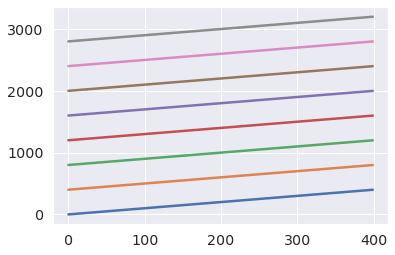

In [1166]:
for ci in class_idxs:
    plt.plot(ci)

In [1167]:
features = compact_data.values

manifolds = []
for ci in class_idxs:
    manifolds.append(features[ci])
manifolds = np.stack(manifolds)

In [1168]:
# Try z-scoring
mu = manifolds.mean((0,1))
std = manifolds.std((0,1))

manifolds = (manifolds - mu) 

In [1169]:
Rs = []
centers = []
Us = []
for manifold in manifolds:
    centers.append(manifold.mean(0))
    U,R,V = np.linalg.svd(manifold - manifold.mean(0),full_matrices=False)
    Rs.append(R)
    Us.append(V)
Rs = np.stack(Rs)
centers = np.stack(centers)
Us = np.stack(Us)

In [1170]:
Ds_IT = (Rs**2).sum(-1)**2 / (Rs**4).sum(-1)

In [1171]:
print(Ds_IT)

[14.555681 19.999992 17.550537 14.183896 11.781406 13.65373  16.18825
 15.580831]


In [1148]:
# Compute error
m = 5
n_avg = 500

def compute_err(manifolds,m):
    err_all = np.zeros((len(manifolds),len(manifolds)))
    err_std = np.zeros((len(manifolds),len(manifolds)))
    for a in tqdm(range(len(manifolds))):
        Xa = manifolds[a]
        for b in range(len(manifolds)):
            Xb = manifolds[b]

            errs = []
            for _ in range(n_avg):
                perma = np.random.permutation(len(Xa))
                permb = np.random.permutation(len(Xb))

                xa,ya = np.split(Xa[perma],(m,))
                xb,yb = np.split(Xb[permb],(m,))
                w = (xa-xb).mean(0)
                mu = (xa+xb).mean(0)/2

                h = ya@w - w@mu
                err = (h<0).mean()
                errs.append(err)
            err_all[a,b] = np.mean(errs)
            err_std[a,b] = np.std(errs)
    np.fill_diagonal(err_all,np.nan)
    
    return err_all, err_std

In [1149]:
err_IT, err_std_IT = compute_err(manifolds,m)

/home/bsorsch/.py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


0.8082436166365281


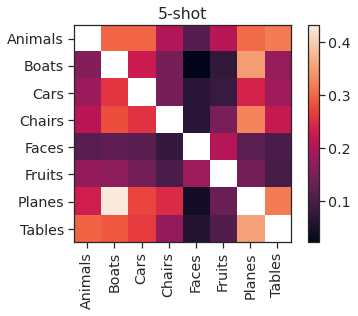

In [1127]:
with sns.axes_style('ticks'):
    plt.imshow(err_IT)
    plt.xticks(range(len(uniq_labels)),list(uniq_labels),rotation=90)
    plt.yticks(range(len(uniq_labels)),list(uniq_labels))
    plt.colorbar()
    plt.title(str(m) +'-shot')
    # plt.axis('off')
print(1-np.nanmean(err_IT))

In [1151]:
def geometry(centers,Rs,Us,m):
    P = manifolds.shape[1]
    dists = np.sqrt(((centers[:,None] - centers[None])**2).sum(-1))
    dist_norm = dists / np.sqrt((Rs**2).sum(-1)[:,None] / P)

    Ds = np.sum(Rs**2,axis=-1)**2 / np.sum(Rs**4, axis=-1)

    # Center-subspace
    csa = []
    csb = []
    for a in range(len(manifolds)):
        for b in range(len(manifolds)):
            if a!=b:
                dx0 = centers[a] - centers[b]
                dx0hat = dx0 / np.linalg.norm(dx0)
                costheta_a = Us[a]@dx0hat
                csa.append((costheta_a**2 * Rs[a]**2).sum() / (Rs[a]**2).sum())
                costheta_b = Us[b]@dx0hat
                csb.append((costheta_b**2 * Rs[b]**2).sum() / (Rs[a]**2).sum())
            else:
                csa.append(np.nan)
                csb.append(np.nan)
    csa = np.stack(csa).reshape(len(manifolds),len(manifolds))
    csb = np.stack(csb).reshape(len(manifolds),len(manifolds))

    # Subspace-subspace
    ss = []
    for a in range(len(manifolds)):
        for b in range(len(manifolds)):
            if a!=b:
                cosphi = Us[a]@Us[b].T
                ss_overlap = (cosphi**2*Rs[a][:,None]**2*Rs[b]**2).sum() / (Rs[a]**2).sum()**2
                ss.append(ss_overlap)
            else:
                ss.append(np.nan)
    ss = np.stack(ss).reshape(len(manifolds),len(manifolds))

    css = (csa + csb/m) * dist_norm**2

    bias = (Rs**2).sum(-1) / (Rs**2).sum(-1)[:,None] - 1
    SNR = 1/2*(dist_norm**2 + bias/m)/ np.sqrt(1/Ds[:,None]/m + css + ss/m)
    
    return dist_norm, Ds, csa, ss, SNR

In [1152]:
dist_norm_IT, Ds_IT, csa_IT, ss_IT, SNR_IT = geometry(centers,Rs,Us,m)

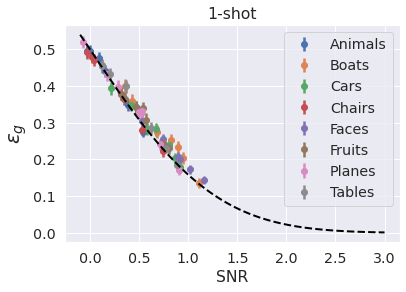

In [1122]:
x = np.linspace(-0.1,3,100)
for i in range(len(manifolds)):
#     plt.scatter(SNR[i], err_all[i], label=uniq_labels[i])
    plt.errorbar(SNR_IT[i], err_IT[i],
                 yerr=err_std_IT[i]/np.sqrt(n_avg)*3, label=uniq_labels[i], fmt='o')
plt.plot(x,H(x),linestyle='dashed',c='black', linewidth=2, zorder=99)
plt.legend();
plt.xlabel('SNR')
plt.ylabel(r'$\varepsilon_g$', fontsize=20)
plt.title(str(m)+'-shot');
# plt.savefig('5_shot.png')

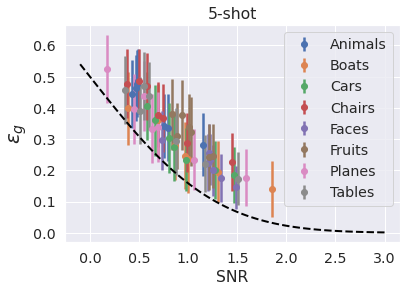

In [978]:
x = np.linspace(-0.1,3,100)
for i in range(len(manifolds)):
#     plt.scatter(SNR[i], err_all[i], label=uniq_labels[i])
    plt.errorbar(SNR_IT[i], err_IT[i],
                 yerr=err_std_IT[i]/np.sqrt(n_avg)*3, label=uniq_labels[i], fmt='o')
plt.plot(x,H(x),linestyle='dashed',c='black', linewidth=2, zorder=99)
plt.legend();
plt.xlabel('SNR')
plt.ylabel(r'$\varepsilon_g$', fontsize=20)
plt.title(str(m)+'-shot');
# plt.savefig('5_shot.png')

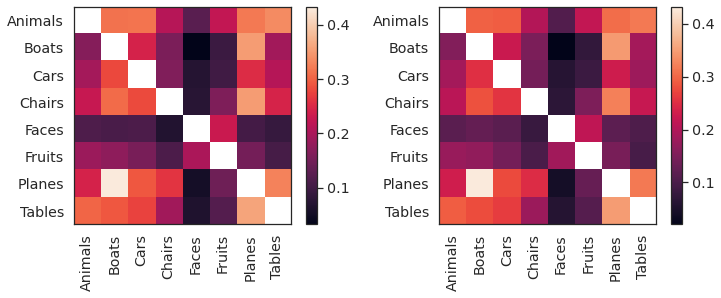

In [390]:
with sns.axes_style('white'):
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.imshow(H(SNR))
    plt.xticks(range(len(uniq_labels)),list(uniq_labels),rotation=90)
    plt.yticks(range(len(uniq_labels)),list(uniq_labels))
    plt.colorbar()
    plt.subplot(122)
    plt.imshow(err_all)
    plt.xticks(range(len(uniq_labels)),list(uniq_labels),rotation=90)
    plt.yticks(range(len(uniq_labels)),list(uniq_labels))
    plt.colorbar();

In [333]:
bias = (Rs**2).sum(-1)/(Rs**2).sum(-1)[:,None] - 1

In [338]:
noise = np.sqrt(1/Ds_IT[:,None]/m + csa_IT + ss_IT/m)

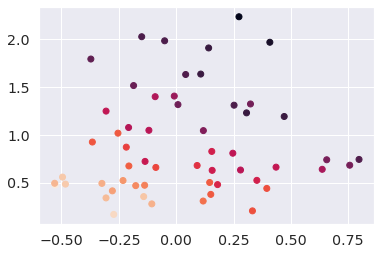

In [341]:
plt.scatter( (bias/np.sqrt(noise))[~mask],
            ( dist_norm_IT**2/np.sqrt(noise))[~mask], c=err_IT[~mask])

# V4

In [1156]:
compact_data = neural_data.multi_groupby(['category_name', 'object_name', 'image_id']).mean(dim='presentation')  # (1)
compact_data = compact_data.sel(region='V4')  # (2)
compact_data = compact_data.squeeze('time_bin')  # (3)
compact_data = compact_data.transpose('presentation', 'neuroid')  # (4)

In [1090]:
compact_data = compact_data[stim_to_cd[640:]]

In [1157]:
features_v4 = compact_data.values

manifolds_v4 = []
for ci in class_idxs:
    manifolds_v4.append(features_v4[ci])
manifolds_v4 = np.stack(manifolds_v4)

In [1158]:
# # Try z-scoring
# mu = manifolds_v4.mean((0,1))
# std = manifolds_v4.std((0,1))

# manifolds_v4 = (manifolds_v4 - mu) / std

In [1159]:
Rs_v4 = []
centers_v4 = []
Us_v4 = []
for manifold in manifolds_v4:
    centers_v4.append(manifold.mean(0))
    U,R,V = np.linalg.svd(manifold - manifold.mean(0),full_matrices=False)
    Rs_v4.append(R)
    Us_v4.append(V)
Rs_v4 = np.stack(Rs_v4)
centers_v4 = np.stack(centers_v4)
Us_v4 = np.stack(Us_v4)

In [1160]:
Ds_v4 = np.sum(Rs_v4**2,axis=-1)**2 / np.sum(Rs_v4**4, axis=-1)

In [1161]:
print('V4 Dsvd: ' + str(Ds_v4 ))

V4 Dsvd: [ 8.907412  11.928525   8.232498   6.7768307  7.097783   9.158406
  8.5641575  7.6944575]


In [1073]:
err_v4, err_v4_std = compute_err(manifolds_v4,m)

/home/bsorsch/.py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


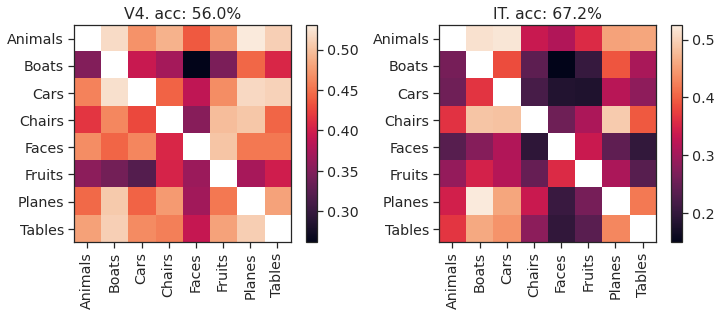

In [1074]:
plt.figure(figsize=(12,4))
with sns.axes_style('ticks'):
    plt.subplot(121)
    plt.imshow(err_v4)
    plt.xticks(range(len(uniq_labels)),list(uniq_labels),rotation=90)
    plt.yticks(range(len(uniq_labels)),list(uniq_labels))
    plt.colorbar()
    # plt.axis('off')
    plt.title('V4. acc: {:.1f}%'.format(100*(1-np.nanmean(err_v4))))
    
    plt.subplot(122)
    plt.imshow(err_IT)
    plt.xticks(range(len(uniq_labels)),list(uniq_labels),rotation=90)
    plt.yticks(range(len(uniq_labels)),list(uniq_labels))
    plt.colorbar()
    # plt.axis('off')
    plt.title('IT. acc: {:.1f}%'.format(100*(1-np.nanmean(err_IT))))

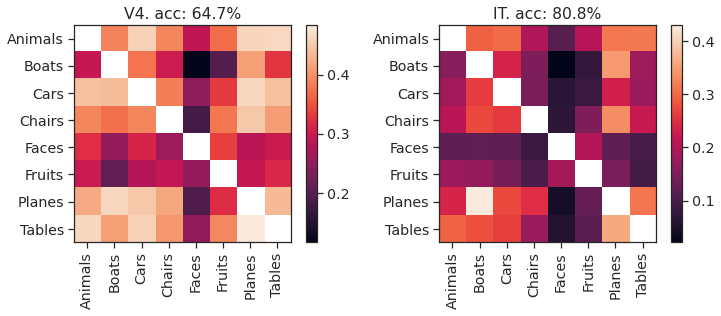

In [455]:
plt.figure(figsize=(12,4))
with sns.axes_style('ticks'):
    plt.subplot(121)
    plt.imshow(err_v4)
    plt.xticks(range(len(uniq_labels)),list(uniq_labels),rotation=90)
    plt.yticks(range(len(uniq_labels)),list(uniq_labels))
    plt.colorbar()
    # plt.axis('off')
    plt.title('V4. acc: {:.1f}%'.format(100*(1-np.nanmean(err_v4))))
    
    plt.subplot(122)
    plt.imshow(err_IT)
    plt.xticks(range(len(uniq_labels)),list(uniq_labels),rotation=90)
    plt.yticks(range(len(uniq_labels)),list(uniq_labels))
    plt.colorbar()
    # plt.axis('off')
    plt.title('IT. acc: {:.1f}%'.format(100*(1-np.nanmean(err_IT))))

In [1075]:
dist_norm_v4, Ds_v4, csa_v4, ss_v4, SNR_v4 = geometry(centers_v4,Rs_v4,Us_v4,m)

In [1076]:
Ds_v4

array([5.2430253, 8.163986 , 5.8866034, 4.7504606, 4.7811885, 6.544756 ,
       5.1978526, 5.1205797], dtype=float32)

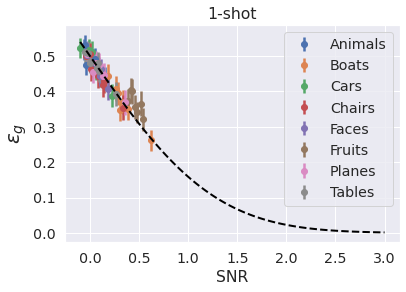

In [1079]:
x = np.linspace(-0.1,3,100)
for i in range(len(manifolds)):
#     plt.scatter(SNR[i], err_all[i], label=uniq_labels[i])
    plt.errorbar(SNR_v4[i], err_v4[i], yerr=err_v4_std[i]/np.sqrt(n_avg)*3,
                 label=uniq_labels[i], fmt='o')
plt.plot(x,H(x),linestyle='dashed',c='black', linewidth=2, zorder=99)
plt.legend();
plt.xlabel('SNR')
plt.ylabel(r'$\varepsilon_g$', fontsize=20)
plt.title(str(m)+'-shot');
# plt.savefig('5_shot.png')

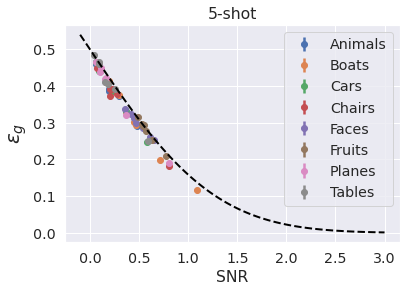

In [456]:
x = np.linspace(-0.1,3,100)
for i in range(len(manifolds)):
#     plt.scatter(SNR[i], err_all[i], label=uniq_labels[i])
    plt.errorbar(SNR_v4[i], err_v4[i], yerr=err_std[i]/np.sqrt(n_avg)*3, label=uniq_labels[i], fmt='o')
plt.plot(x,H(x),linestyle='dashed',c='black', linewidth=2, zorder=99)
plt.legend();
plt.xlabel('SNR')
plt.ylabel(r'$\varepsilon_g$', fontsize=20)
plt.title(str(m)+'-shot');
# plt.savefig('5_shot.png')

# Stimuli

In [988]:
stimulus_set = neural_data.attrs['stimulus_set']

In [651]:
image_path = stimulus_set.get_image(stimulus_set['image_id'][0])
print(image_path)

/home/bsorsch/.brainio/image_dicarlo_hvm-public/8a72e2bfdb8c267b57232bf96f069374d5b21832.png


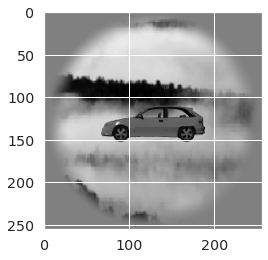

In [652]:
%matplotlib inline
from matplotlib import pyplot, image
img = image.imread(image_path)
pyplot.imshow(img)
pyplot.show()

In [653]:
imnames = stimulus_set['filename'].values

In [654]:
categories = stimulus_set['category_name'].values
uniq_cats = np.unique(categories)

cat_idxs = []
for cat in uniq_cats:
    cat_idxs.append(np.where(categories==cat)[0])

In [412]:
import os
imfiles = os.listdir('/home/bsorsch/.brainio/image_dicarlo_hvm-public/')
imfiles = [im for im in imfiles if '.png' in im]
imfiles = np.stack(imfiles)

In [413]:
stim_idxs = []
for imname in imnames:
    stim_idxs.append(np.where(imfiles==imname)[0][0])
stim_idxs = np.stack(stim_idxs)

# V1 and pixels

In [414]:
features_v1 = np.load('manifold/data/dicarlo_V1_manifolds.npy')

In [415]:
manifolds_v1 = []
for cat in cat_idxs:
    manifolds_v1.append(features_v1[stim_idxs[cat]])

In [416]:
Rs_v1 = []
centers_v1 = []
Us_v1 = []
for manifold in tqdm(manifolds_v1):
    centers_v1.append(manifold.mean(0))
    U,R,V = np.linalg.svd(manifold - manifold.mean(0),full_matrices=False)
    Rs_v1.append(R)
    Us_v1.append(V)
Rs_v1 = np.stack(Rs_v1)
centers_v1 = np.stack(centers_v1)
Us_v1 = np.stack(Us_v1)

/home/bsorsch/.py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [417]:
dist_norm_v1, Ds_v1, csa_v1, SNR_v1 = geometry(centers_v1,Rs_v1,Us_v1,m)

In [457]:
err_v1 = compute_err(manifolds_v1,m)

/home/bsorsch/.py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


# Pixels

In [418]:
categories = stimulus_set['category_name'].values
uniq_cats = np.unique(categories)

cat_idxs = []
for cat in uniq_cats:
    cat_idxs.append(np.where(categories==cat)[0])

In [419]:
from PIL import Image
im = np.array(Image.open(image_path))

In [420]:
imnames_sort = []
for cat in cat_idxs:
    imnames_sort.append(imnames[cat])

In [573]:
np.save('manifold/data/majaj_2015_imnames.npy', imnames_sort)

In [421]:
imnames = stimulus_set['image_id'].values

idxs = np.random.choice(256*256*3, 2048, replace=False)
manifolds_im = []
for cat in tqdm(cat_idxs):
    for im in imnames[cat]:
        image_path = stimulus_set.get_image(im)
        manifolds_im.append(np.array(Image.open(image_path),dtype='float').flatten()[idxs])
manifolds_im = np.stack(manifolds_im).reshape(8,400,2048)

/home/bsorsch/.py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


In [422]:
Rs_im = []
centers_im = []
Us_im = []
for manifold in tqdm(manifolds_im):
    centers_im.append(manifold.mean(0))
    U,R,V = np.linalg.svd(manifold - manifold.mean(0),full_matrices=False)
    Rs_im.append(R)
    Us_im.append(V)
Rs_im = np.stack(Rs_im)
centers_im = np.stack(centers_im)
Us_im = np.stack(Us_im)

/home/bsorsch/.py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [423]:
dist_norm_im, Ds_im, csa_im, SNR_im = geometry(centers_im,Rs_im,Us_im,m)

In [458]:
err_im = compute_err(manifolds_im,m)

/home/bsorsch/.py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [424]:
sns.set_style('darkgrid')

In [444]:
print(np.mean(Ds_v1)),
print(np.mean(Ds_v4)), 
print(np.mean(Ds_IT))

76.9266
6.247783
15.4367895


In [460]:
print(np.mean(err_v1[~mask])),
print(np.mean(err_v4[~mask])), 
print(np.mean(err_IT[~mask]))

0.4754204339963834
0.35338707052441226
0.19225967450271247


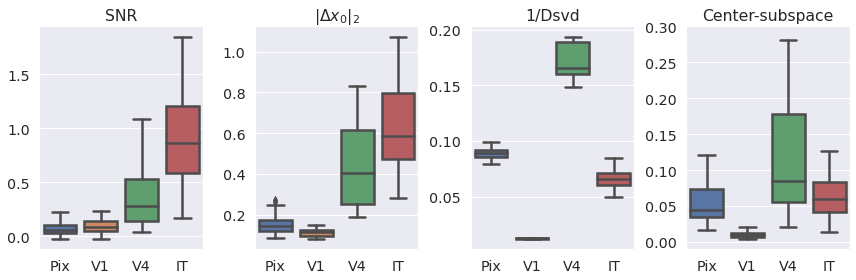

In [426]:
plt.figure(figsize=(12,4))

mask = np.eye(8,dtype='bool')

plt.subplot(141)
sns.boxplot(data=[SNR_im[~mask], SNR_v1[~mask],SNR_v4[~mask], SNR_IT[~mask]])
plt.title('SNR');
plt.xticks([0,1,2,3],['Pix','V1','V4','IT'])

plt.subplot(142)
sns.boxplot(data=[dist_norm_im[~mask], dist_norm_v1[~mask],dist_norm_v4[~mask], dist_norm_IT[~mask]])
plt.title(r'$\|\Delta x_0\|_2$');
plt.xticks([0,1,2,3],['Pix','V1','V4','IT'])

plt.subplot(143)
sns.boxplot(data=[1/Ds_im, 1/Ds_v1, 1/Ds_v4, 1/Ds_IT], fliersize=0)
plt.title('1/Dsvd')
plt.xticks([0,1,2,3],['Pix','V1','V4','IT'])

plt.subplot(144)
sns.boxplot(data=[css_im[~mask], css_v1[~mask], css_v4[~mask], css_IT[~mask]], fliersize=0)
plt.title('Center-subspace');
plt.xticks([0,1,2,3],['Pix','V1','V4','IT'])
plt.ylim([-.01,0.3])
plt.tight_layout();

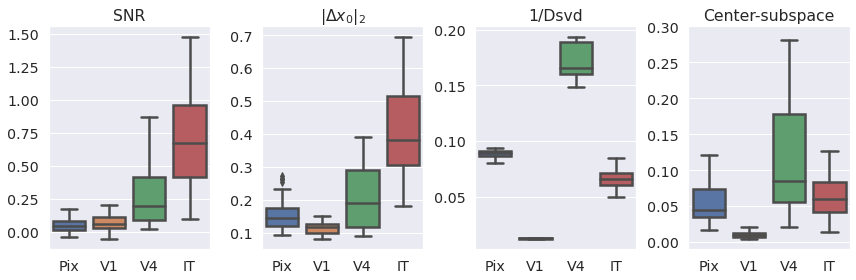

In [78]:
plt.figure(figsize=(12,4))

mask = np.eye(8,dtype='bool')

plt.subplot(141)
sns.boxplot(data=[SNR_im[~mask], SNR_v1[~mask],SNR_v4[~mask], SNR_IT[~mask]])
plt.title('SNR');
plt.xticks([0,1,2,3],['Pix','V1','V4','IT'])

plt.subplot(142)
sns.boxplot(data=[dist_norm_im[~mask], dist_norm_v1[~mask],dist_norm_v4[~mask], dist_norm_IT[~mask]])
plt.title(r'$\|\Delta x_0\|_2$');
plt.xticks([0,1,2,3],['Pix','V1','V4','IT'])

plt.subplot(143)
sns.boxplot(data=[1/Ds_im, 1/Ds_v1, 1/Ds_v4, 1/Ds_IT], fliersize=0)
plt.title('1/Dsvd')
plt.xticks([0,1,2,3],['Pix','V1','V4','IT'])

plt.subplot(144)
sns.boxplot(data=[css_im[~mask], css_v1[~mask], css_v4[~mask], css_IT[~mask]], fliersize=0)
plt.title('Center-subspace');
plt.xticks([0,1,2,3],['Pix','V1','V4','IT'])
plt.ylim([-.01,0.3])
plt.tight_layout();

# Semantic

In [5]:
root = '/mnt/fs2/bsorsch/manifold/embeddings/1k_objects/'
names = np.load(root + 'names.npy')
root_paths = np.load(root + 'root_paths.npy',allow_pickle=True)

In [6]:
root_paths_21k = np.load('manifold_old/data/21k_root_paths.npy',allow_pickle=True)

In [8]:
# Wordnet tools
import pandas as pd
wordnet = np.load('manifold_old/data/wordnet_hierarchy.npy', allow_pickle=True)
synset_wnids = pd.read_csv('manifold_old/data/words.txt', sep='\t')
synset_wnids = synset_wnids.to_numpy()

def class_from_wnid(wnid):
    return  synset_wnids[np.where(synset_wnids==wnid)[0], 1][0]
# get_class_name(wnid)

def wnid_from_class(classname):
    return  synset_wnids[np.where(synset_wnids==classname)[0], 0][0]

def get_parent(cls):
    # Try to find parent
    try:
        wnid = wnid_from_class(cls)
        parent_loc = np.where(np.where(wordnet==wnid)[1]==1)
        parent_idx = np.where(wordnet==wnid)[0][parent_loc]
        parent_wnid = wordnet[parent_idx][0,0]
        parent_cls = class_from_wnid(parent_wnid)
        return parent_cls
    # If already at top of tree, return None
    except:
        return None
    

In [69]:
i = 0
rp = []
cls = 'instrumentality, instrumentation'
rp.append(cls)
parent = get_parent(cls)
while parent:
    rp.append(parent)
    cls = parent
    parent = get_parent(cls)
print(rp)

['instrumentality, instrumentation', 'artifact, artefact', 'whole, unit', 'object, physical object', 'physical entity']


In [74]:
# Root paths
animal_rp = ['animal, animate being, beast, brute, creature, fauna', 'organism, being', 'living thing, animate thing', 'whole, unit', 'object, physical object', 'physical entity']
boat_rp = ['boat', 'vessel, watercraft', 'craft', 'vehicle', 'conveyance, transport', 'instrumentality, instrumentation', 'artifact, artefact', 'whole, unit', 'object, physical object', 'physical entity']
car_rp = ['car, auto, automobile, machine, motorcar', 'motor vehicle, automotive vehicle', 'self-propelled vehicle', 'wheeled vehicle', 'vehicle', 'conveyance, transport', 'instrumentality, instrumentation', 'artifact, artefact', 'whole, unit', 'object, physical object', 'physical entity']
chair_rp = ['chair', 'seat', 'furniture, piece of furniture, article of furniture', 'furnishing', 'instrumentality, instrumentation', 'artifact, artefact', 'whole, unit', 'object, physical object', 'physical entity']
face_rp = ['face, human face', 'external body part', 'body part', 'part, piece', 'thing', 'physical entity']
fruit_rp = ['edible fruit', 'fruit', 'reproductive structure', 'plant organ', 'plant part, plant structure', 'natural object', 'whole, unit', 'object, physical object', 'physical entity']
plane_rp = ['aircraft', 'craft', 'vehicle', 'conveyance, transport', 'instrumentality, instrumentation', 'artifact, artefact', 'whole, unit', 'object, physical object', 'physical entity']
table_rp = ['table', 'furniture, piece of furniture, article of furniture', 'furnishing', 'instrumentality, instrumentation', 'artifact, artefact', 'whole, unit', 'object, physical object', 'physical entity']

In [75]:
majaj_rps = [animal_rp,boat_rp,car_rp,
             chair_rp,face_rp,fruit_rp,
             plane_rp,table_rp]

In [76]:
print('Finding tree dists.')
tree_dists = []
for i in tqdm(range(len(majaj_rps))):
    for j in range(len(majaj_rps)):
        for a, catg in enumerate(majaj_rps[i]):
            b = np.where(np.array(majaj_rps[j])==catg)[0]
            if b:
                break
        if b:
            tree_dists.append(int(a+b))
        else:
            if len(root_paths[i]) + len(root_paths[j]) > 2:
                tree_dists.append(len(root_paths[i]) + len(root_paths[j]))
            else:
                tree_dists.append(17)

tree_dists = np.stack(tree_dists).reshape(len(majaj_rps), len(majaj_rps))

Finding tree dists.


/home/bsorsch/.py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


/home/bsorsch/.py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  import sys


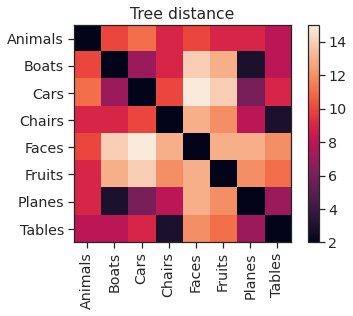

In [77]:
with sns.axes_style('ticks'):
    plt.imshow(tree_dists)
    plt.xticks(range(len(uniq_labels)),list(uniq_labels),rotation=90)
    plt.yticks(range(len(uniq_labels)),list(uniq_labels))
    plt.colorbar()
    plt.title('Tree distance')
    # plt.axis('off')

0.8075334538878842


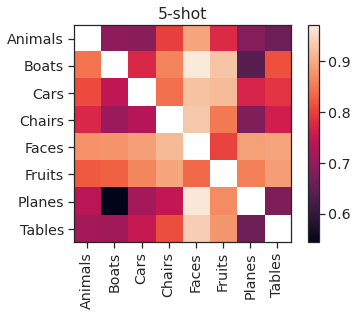

In [61]:
with sns.axes_style('ticks'):
    plt.imshow(1-err_IT)
    plt.xticks(range(len(uniq_labels)),list(uniq_labels),rotation=90)
    plt.yticks(range(len(uniq_labels)),list(uniq_labels))
    plt.colorbar()
    plt.title(str(m) +'-shot')
    # plt.axis('off')
print(1-np.nanmean(err_IT))

In [63]:
uniq_labels

array(['Animals', 'Boats', 'Cars', 'Chairs', 'Faces', 'Fruits', 'Planes',
       'Tables'], dtype=object)

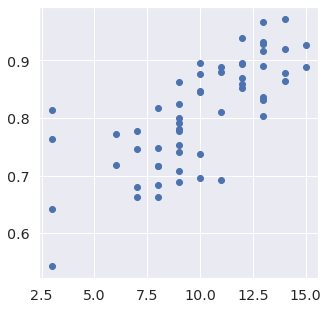

In [80]:
plt.figure(figsize=(5,5))
plt.scatter(tree_dists[~mask], 1-err_IT[~mask])

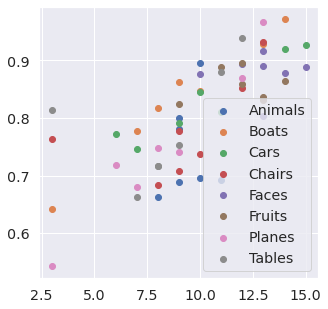

In [79]:
plt.figure(figsize=(5,5))
mask = np.eye(8,dtype='bool')
for i in range(8):
    plt.scatter(tree_dists[i], 1-err_IT[i], label=uniq_labels[i])
plt.legend()

(array([ 4.,  0.,  2.,  4.,  6., 16.,  4.,  6.,  8.,  6.]),
 array([ 3. ,  4.2,  5.4,  6.6,  7.8,  9. , 10.2, 11.4, 12.6, 13.8, 15. ]),
 <BarContainer object of 10 artists>)

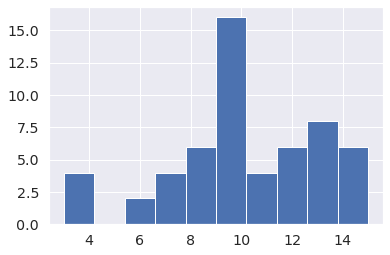

In [128]:
plt.hist(tree_dists[~mask].ravel())

In [120]:
cond_dist = []
cd_mean = []
cd_std = []
counts = []
tds = np.sort(np.unique(tree_dists))[1:]
mask = np.eye(8,dtype='bool')  # remove diagonal entries
for i in tds:
    idxs = np.where(tree_dists[~mask]==i)
    cd_mean.append(np.mean(err_IT[~mask][idxs]))
    cd_std.append(np.std(err_IT[~mask][idxs]))
    counts.append(len(idxs[0]))
cd_mean = np.stack(cd_mean)
cd_std = np.stack(cd_std)

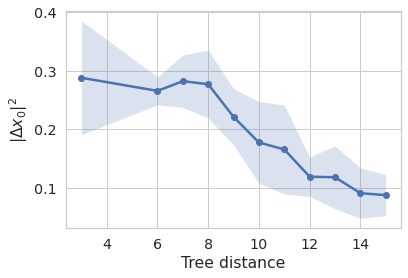

In [121]:
with sns.axes_style('whitegrid'):
    plt.plot(tds,cd_mean, 'o-')
    plt.fill_between(tds,
                     cd_mean+cd_std,cd_mean-cd_std,
                    alpha=0.2)
    plt.ylabel(r'$\|\Delta x_0\|^2$')
    plt.xlabel('Tree distance')

In [101]:
cond_dist = []
cd_mean = []
cd_std = []
counts = []
tds = np.sort(np.unique(tree_dists))[1:]
mask = np.eye(8,dtype='bool')  # remove diagonal entries
for i in tds:
    idxs = np.where(tree_dists[~mask]==i)
    cond_dist.append(dist_norm_IT[~mask][idxs])
    cd_mean.append(np.mean(dist_norm_IT[~mask][idxs]))
    cd_std.append(np.std(dist_norm_IT[~mask][idxs]))
    counts.append(len(idxs[0]))
cd_mean = np.stack(cd_mean)
cd_std = np.stack(cd_std)

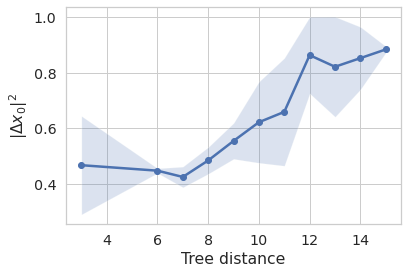

In [104]:
with sns.axes_style('whitegrid'):
    plt.plot(tds,cd_mean, 'o-')
    plt.fill_between(tds,
                     cd_mean+cd_std,cd_mean-cd_std,
                    alpha=0.2)
    plt.ylabel(r'$\|\Delta x_0\|^2$')
    plt.xlabel('Tree distance')

In [116]:
bias = np.abs((Rs**2).sum(-1)/(Rs**2).sum(-1)[:,None] - 1)

In [118]:
cond_dist = []
cb_mean = []
cb_std = []
counts = []
tds = np.sort(np.unique(tree_dists))[1:]
mask = np.eye(8,dtype='bool')  # remove diagonal entries
for i in tds:
    idxs = np.where(tree_dists[~mask]==i)
    cb_mean.append(np.mean(bias[~mask][idxs]))
    cb_std.append(np.std(bias[~mask][idxs]))
    counts.append(len(idxs[0]))
cb_mean = np.stack(cb_mean)
cb_std = np.stack(cb_std)

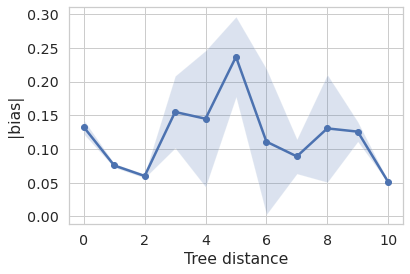

In [119]:
with sns.axes_style('whitegrid'):
    plt.plot(np.arange(len(cb_mean)),cb_mean, 'o-')
    plt.fill_between(np.arange(len(cb_mean)),
                     cb_mean+cb_std,cb_mean-cb_std,
                    alpha=0.2)
    plt.ylabel('|bias|')
    plt.xlabel('Tree distance')

In [105]:
cond_cs = []
cond_cs_mean = []
cond_cs_std = []
counts = []
tds = np.sort(np.unique(tree_dists))[1:]
mask = np.eye(8,dtype='bool')  # remove diagonal entries
for i in tds:
    idxs = np.where(tree_dists[~mask]==i)
    cond_cs.append(csa_IT[~mask][idxs])
    cond_cs_mean.append(np.mean(csa_IT[~mask][idxs]))
    cond_cs_std.append(np.std(csa_IT[~mask][idxs]))
    counts.append(len(idxs[0]))
cond_cs_mean = np.stack(cond_cs_mean)
cond_cs_std = np.stack(cond_cs_std)

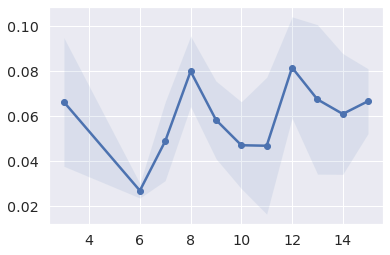

In [115]:
plt.plot(tds, cond_cs_mean, 'o-')
plt.fill_between(tds,
                 cond_cs_mean+cond_cs_std,cond_cs_mean-cond_cs_std,
                alpha=0.1)
# plt.yscale('log')

In [112]:
cond_ss = []
cond_ss_mean = []
cond_ss_std = []
counts = []
tds = np.sort(np.unique(tree_dists))[1:]
mask = np.eye(8,dtype='bool')  # remove diagonal entries
for i in tds:
    idxs = np.where(tree_dists[~mask]==i)
    cond_ss.append(ss_IT[~mask][idxs])
    cond_ss_mean.append(np.mean(ss_IT[~mask][idxs]))
    cond_ss_std.append(np.std(ss_IT[~mask][idxs]))
    counts.append(len(idxs[0]))
cond_ss_mean = np.stack(cond_ss_mean)
cond_ss_std = np.stack(cond_ss_std)

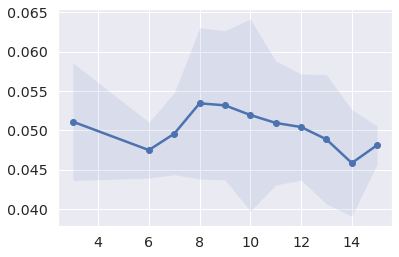

In [114]:
plt.plot(tds,cond_ss_mean, 'o-')
plt.fill_between(tds,
                 cond_ss_mean+cond_ss_std,cond_ss_mean-cond_ss_std,
                alpha=0.1)
# plt.yscale('log')

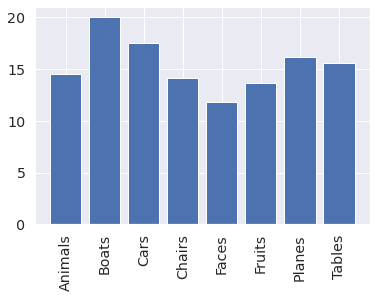

In [126]:
plt.bar(np.arange(len(Ds_IT)),Ds_IT)
plt.xticks(range(len(uniq_labels)),list(uniq_labels),rotation=90);

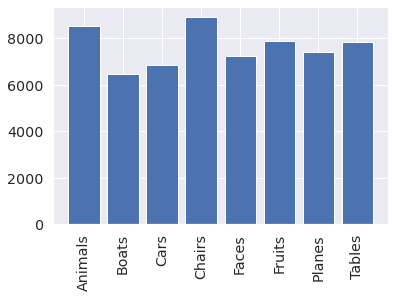

In [129]:
plt.bar(np.arange(len(Ds_IT)),(Rs**2).sum(-1))
plt.xticks(range(len(uniq_labels)),list(uniq_labels),rotation=90);

(array([ 4.,  8.,  8.,  7., 10.,  4.,  8.,  5.,  0.,  2.]),
 array([0.0142264 , 0.0255404 , 0.0368544 , 0.0481684 , 0.0594824 ,
        0.0707964 , 0.0821104 , 0.09342441, 0.10473841, 0.11605241,
        0.12736641]),
 <BarContainer object of 10 artists>)

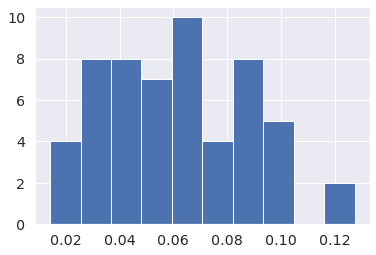

In [130]:
plt.hist(csa_IT[~mask])

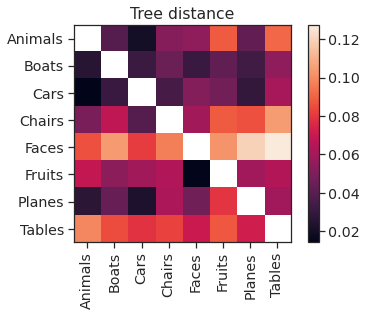

In [137]:
with sns.axes_style('ticks'):
    plt.imshow(csa_IT)
    plt.xticks(range(len(uniq_labels)),list(uniq_labels),rotation=90)
    plt.yticks(range(len(uniq_labels)),list(uniq_labels))
    plt.colorbar()
    plt.title('Tree distance')
    # plt.axis('off')

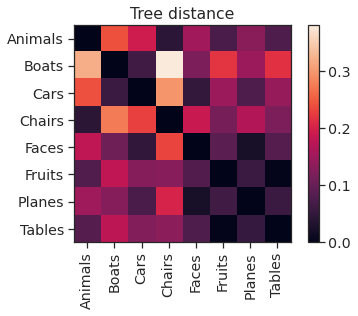

In [140]:
with sns.axes_style('ticks'):
    plt.imshow(bias)
    plt.xticks(range(len(uniq_labels)),list(uniq_labels),rotation=90)
    plt.yticks(range(len(uniq_labels)),list(uniq_labels))
    plt.colorbar()
    plt.title('Tree distance')
    # plt.axis('off')

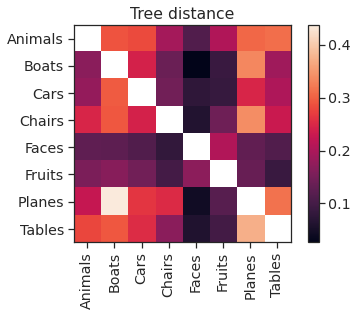

In [167]:
with sns.axes_style('ticks'):
    plt.imshow(err_IT)
    plt.xticks(range(len(uniq_labels)),list(uniq_labels),rotation=90)
    plt.yticks(range(len(uniq_labels)),list(uniq_labels))
    plt.colorbar()
    plt.title('Tree distance')
    # plt.axis('off')

In [168]:
i1,i2 = np.unravel_index(np.argsort((err_IT - err_IT.T).ravel()),(8,8))

In [169]:
err_IT[i1,i2] - err_IT[i2,i1]

array([-0.1543038 , -0.11962025, -0.1035443 , -0.10237975, -0.102     ,
       -0.09994937, -0.09592405, -0.08665823, -0.08478481, -0.07949367,
       -0.07718987, -0.06225316, -0.06010127, -0.05726582, -0.05481013,
       -0.05189873, -0.05179747, -0.05040506, -0.04964557, -0.04306329,
       -0.03475949, -0.03440506, -0.03410127, -0.01825316, -0.0176962 ,
       -0.01594937, -0.0144557 , -0.01      ,  0.01      ,  0.0144557 ,
        0.01594937,  0.0176962 ,  0.01825316,  0.03410127,  0.03440506,
        0.03475949,  0.04306329,  0.04964557,  0.05040506,  0.05179747,
        0.05189873,  0.05481013,  0.05726582,  0.06010127,  0.06225316,
        0.07718987,  0.07949367,  0.08478481,  0.08665823,  0.09592405,
        0.09994937,  0.102     ,  0.10237975,  0.1035443 ,  0.11962025,
        0.1543038 ,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan])

In [174]:
for i in range(5):
    print(uniq_labels[i1[i]] + ' vs ' + uniq_labels[i2[i]])

Boats vs Chairs
Boats vs Animals
Boats vs Tables
Boats vs Planes
Cars vs Animals


In [175]:
err_IT[i1[0],i2[0]]

0.13908860759493671

In [176]:
err_IT[i2[0],i1[0]]

0.2933924050632911

# Classification

In [619]:
from sklearn.svm import SVC
svm = SVC(C=5e4, kernel='linear')

In [620]:
ntrain = int(0.8*400)
train_idxs, test_idxs = np.split(np.random.permutation(400), (ntrain,))
Xtrain = manifolds[:,train_idxs].reshape(-1,168)
Xtest = manifolds[:,test_idxs].reshape(-1,168)
ytrain = np.repeat(np.arange(8),ntrain)
ytest = np.repeat(np.arange(8),400-ntrain)

## Pairwise

In [621]:
ntrain = int(0.8*400)
n_avg = 10
ytrain = np.repeat(np.arange(2),ntrain)
ytest = np.repeat(np.arange(2),400-ntrain)

K = 8
pair_errs = []
for _ in tqdm(range(n_avg)):
    train_idxs, test_idxs = np.split(np.random.permutation(400), (ntrain,))
    for a in range(K):
        for b in range(K):
            if a!=b:
                Xtrain = np.vstack([manifolds[a,train_idxs],manifolds[b,train_idxs]])
                Xtest = np.vstack([manifolds[a,test_idxs],manifolds[b,test_idxs]])
                svm.fit(Xtrain,ytrain)
                yhat = svm.predict(Xtest)
                pair_errs.append(np.mean(yhat!=ytest))
            else:
                pair_errs.append(np.nan)
pair_errs = np.stack(pair_errs).reshape(n_avg,K,K)

/home/bsorsch/.py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


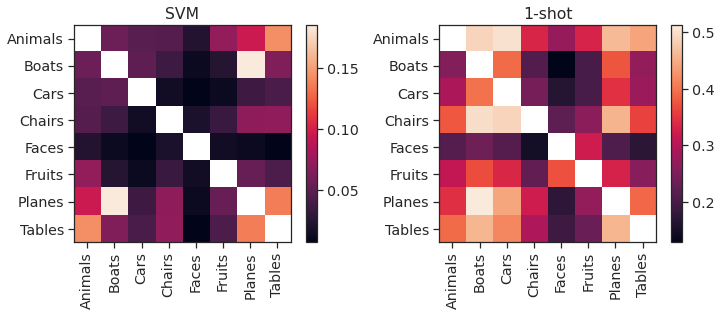

In [622]:
with sns.axes_style('ticks'):
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.imshow(pair_errs.mean(0))
    plt.xticks(range(len(uniq_labels)),list(uniq_labels),rotation=90)
    plt.yticks(range(len(uniq_labels)),list(uniq_labels))
    plt.colorbar()
    plt.title('SVM')
    
    plt.subplot(122)
    plt.imshow(err_IT)
    plt.xticks(range(len(uniq_labels)),list(uniq_labels),rotation=90)
    plt.yticks(range(len(uniq_labels)),list(uniq_labels))
    plt.colorbar()
    plt.title(str(m) +'-shot')

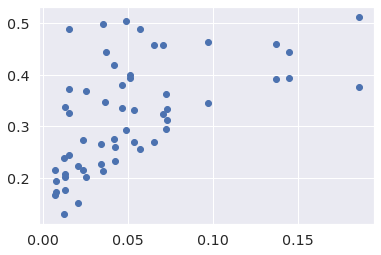

In [623]:
plt.scatter(pair_errs.mean(0)[~mask], err_IT[~mask])

# Prototype vs exemplar

In [269]:
# Compute error
m = 1
n_avg = 1000

def compute_err(manifolds,m):
    err_all = np.zeros((len(manifolds),len(manifolds)))
    err_std = np.zeros((len(manifolds),len(manifolds)))
    for a in tqdm(range(len(manifolds)),leave=False):
        Xa = manifolds[a]
        for b in range(len(manifolds)):
            Xb = manifolds[b]

            errs = []
            for _ in range(n_avg):
                perma = np.random.permutation(len(Xa))
                permb = np.random.permutation(len(Xb))

                xa,ya = np.split(Xa[perma],(m,))
                xb,yb = np.split(Xb[permb],(m,))
                w = (xa-xb).mean(0)
                mu = (xa+xb).mean(0)/2

                h = ya@w - w@mu
                err = (h<0).mean()
                errs.append(err)
            err_all[a,b] = np.mean(errs)
            err_std[a,b] = np.std(errs)
    np.fill_diagonal(err_all,np.nan)
    
    return err_all, err_std

In [272]:
ms = np.arange(1,10)
errs = []
for m in ms:
    err,_ = compute_err(manifolds,m)
    errs.append(err)
errs = np.stack(errs)

/home/bsorsch/.py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [322]:
from sklearn.svm import LinearSVC, SVC
# svm = LinearSVC(C=1e10,intercept_scaling=1e10)
svm = SVC(C=1000, kernel='linear',)

In [323]:
from sklearn.neighbors import KNeighborsClassifier
NN = KNeighborsClassifier(n_neighbors=1,)

In [328]:
P = 400
ms = np.arange(1,20)
n_avg = 100
svm_errs = []
NN_errs = []
proto_errs = []
for m in tqdm(ms):
    for _ in range(n_avg):
        for a in range(K):
            for b in range(K):
                if a!=b:
                    tr_idxs_a,ts_idxs_a = np.split(np.random.permutation(400), (m,))
                    tr_idxs_b,ts_idxs_b = np.split(np.random.permutation(400), (m,))
                    
                    # Prototype
                    xa = manifolds[a,tr_idxs_a]
                    xb = manifolds[b,tr_idxs_b]
                    xa_test = manifolds[a,ts_idxs_a]
                    w = (xa-xb).mean(0)
                    mu = (xa+xb).mean(0)/2
                    h = xa_test@w - w@mu
                    err = (h<0).mean()
                    proto_errs.append(err)

                    # SVM
                    Xtrain = np.vstack([xa,xb])
                    ytrain = np.concatenate([np.ones(m), -np.ones(m)])                    
                    svm.fit(Xtrain,ytrain)
                    svm_errs.append((svm.predict(manifolds[a,ts_idxs_a])!=1).mean())
                    
                    #NN
                    NN.fit(Xtrain,ytrain)
                    NN_errs.append((NN.predict(manifolds[a,ts_idxs_a])!=1).mean())
                else:
                    svm_errs.append(np.nan)
                    NN_errs.append(np.nan)
                    proto_errs.append(np.nan)
svm_errs = np.stack(svm_errs).reshape(len(ms),n_avg, K, K)
NN_errs = np.stack(NN_errs).reshape(len(ms),n_avg, K, K)
proto_errs = np.stack(proto_errs).reshape(len(ms),n_avg, K, K)

/home/bsorsch/.py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


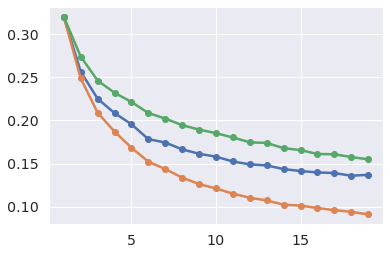

In [330]:
plt.plot(ms, proto_errs[:,:,~mask].mean((1,2)), 'o-')
plt.plot(ms, svm_errs[:,:,~mask].mean((1,2)), 'o-')
plt.plot(ms, NN_errs[:,:,~mask].mean((1,2)), 'o-')
# plt.yscale('log')

## Theory for svm

In [352]:
m = 5
ntrain = int(0.8*400)

ytrain = np.repeat(np.arange(2),ntrain)
ytest = np.repeat(np.arange(2),400-ntrain)

K = 8
n_avg = 10
pair_errs = []
for _ in tqdm(range(n_avg)):
    train_idxs, test_idxs = np.split(np.random.permutation(400), (ntrain,))
    for a in range(K):
        for b in range(K):
            if a!=b:
                Xtrain = np.vstack([manifolds[a,train_idxs],manifolds[b,train_idxs]])
                Xtest = np.vstack([manifolds[a,test_idxs],manifolds[b,test_idxs]])
                svm.fit(Xtrain,ytrain)
                yhat = svm.predict(Xtest)
                pair_errs.append(np.mean(yhat!=ytest))
            else:
                pair_errs.append(np.nan)

/home/bsorsch/.py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


In [360]:
pair_errs = np.stack(pair_errs).reshape(n_avg,K,K).mean(0)

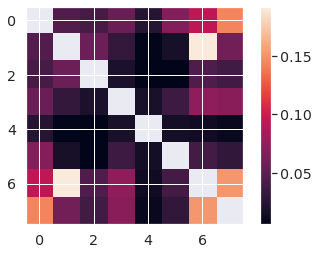

In [363]:
plt.imshow(pair_errs)
plt.colorbar();

In [377]:
1-np.mean(pair_errs[~mask])

0.9495535714285714

In [395]:
P = 400
m = 5
n_avg = 500
svm_errs = []
NN_errs = []
proto_errs = []
for _ in tqdm(range(n_avg)):
    for a in range(K):
        for b in range(K):
            if a!=b:
                tr_idxs_a,ts_idxs_a = np.split(np.random.permutation(400), (m,))
                tr_idxs_b,ts_idxs_b = np.split(np.random.permutation(400), (m,))

#                 # Prototype
                xa = manifolds[a,tr_idxs_a]
                xb = manifolds[b,tr_idxs_b]
#                 xa_test = manifolds[a,ts_idxs_a]
#                 w = (xa-xb).mean(0)
#                 mu = (xa+xb).mean(0)/2
#                 h = xa_test@w - w@mu
#                 err = (h<0).mean()
#                 proto_errs.append(err)

                # SVM
                Xtrain = np.vstack([xa,xb])
                ytrain = np.concatenate([np.ones(m), -np.ones(m)])                    
                svm.fit(Xtrain,ytrain)
                svm_errs.append((svm.predict(manifolds[a,ts_idxs_a])!=1).mean())
            else:
                svm_errs.append(np.nan)
                NN_errs.append(np.nan)
                proto_errs.append(np.nan)
svm_errs = np.stack(svm_errs).reshape(n_avg, K, K)
# proto_errs = np.stack(proto_errs).reshape(n_avg, K, K)

/home/bsorsch/.py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


In [396]:
svm_mean = np.stack(svm_errs).reshape(n_avg, K, K).mean(0)
svm_std = np.stack(svm_errs).reshape(n_avg, K, K).std(0)

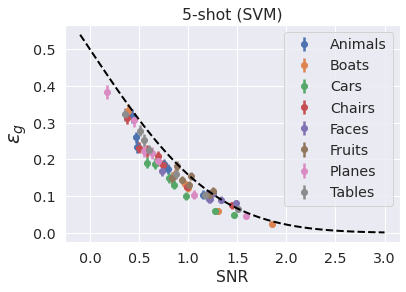

In [398]:
x = np.linspace(-0.1,3,100)
for i in range(len(manifolds)):
#     plt.scatter(SNR[i], err_all[i], label=uniq_labels[i])
    plt.errorbar(SNR_IT[i], svm_mean[i],
                 yerr=svm_std[i]/np.sqrt(n_avg)*3, label=uniq_labels[i], fmt='o')
plt.plot(x,H(x),linestyle='dashed',c='black', linewidth=2, zorder=99)
plt.legend();
plt.xlabel('SNR')
plt.ylabel(r'$\varepsilon_g$', fontsize=20)
plt.title(str(m)+'-shot (SVM)');
# plt.savefig('5_shot.png')

# Behavioral data

In [399]:
behav_data = brainscore.get_assembly("dicarlo.Rajalingham2018.public")

brainio.dicarlo/assy_dicarlo_Rajalingham2018_public.nc: 100%|██████████| 253M/253M [00:06<00:00, 40.2MB/s] 
brainio.dicarlo/image_dicarlo_objectome_public.csv: 100%|██████████| 270k/270k [00:00<00:00, 619kB/s]
brainio.dicarlo/image_dicarlo_objectome_public.zip: 100%|██████████| 79.6M/79.6M [00:05<00:00, 13.5MB/s]
/home/bsorsch/.py37/lib/python3.7/site-packages/xarray/core/dataarray.py:218: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif isinstance(data, pd.Panel):
/home/bsorsch/.py37/lib/python3.7/site-packages/brainio_base/assemblies.py:213: FutureWarning: The inplace argument has been deprecated and will be removed in a future version of xarray.
  xr_data.set_index(append=True, inplace=True, **coords_d)


In [411]:
behav_data

<xarray.BehavioralAssembly 'dicarlo.Rajalingham2018.public' (presentation: 585511)>
array(['MB28699', '22_acoustic_guitar', 'MB27346', ...,
       'antique_furniture_item_18', 'MB29874', 'MB28699'], dtype=object)
Coordinates:
  * presentation      (presentation) MultiIndex
  - sample_obj        (presentation) object 'MB28699' ... 'calc01'
  - dist_obj          (presentation) object 'dromedary' ... 'interior_details_130_2'
  - choice            (presentation) object 'MB28699' ... 'calc01'
  - image_id          (presentation) object 'acaf817c42d2a46130e6ee67dad1b7d01f5276ab' ... 'afb7291a9151fe69008188023cfda6c356cab561'
  - WorkerID          (presentation) object 'AIW6ALUI8LBXV' ... 'AKF8Y5DQ9PJP9'
  - AssignmentID      (presentation) object '2W9GYQ4J3NABXRMPS3FY2IT39ZKCPJ' ... '2IS6UFBNFSVGL1M6MTJWANG3V884IM'
  - truth             (presentation) object 'MB28699' ... 'calc01'
  - image_label       (presentation) object 'MB28699' ... 'calc01'
  - filename          (presentation) object '

In [410]:
np.mean(behav_data['choice'].values[:500] == behav_data['sample_obj'].values[:500])

0.89

In [408]:
behav_data['sample_obj'].values[:20]

array(['MB28699', '22_acoustic_guitar', 'MB27346',
       'lo_poly_animal_BEAR_BLK', 'MB30203', 'lo_poly_animal_BEAR_BLK',
       'lo_poly_animal_CHICKDEE', 'zebra', 'MB28699',
       'lo_poly_animal_CHICKDEE', 'MB30203', 'lo_poly_animal_RHINO_2',
       'lo_poly_animal_TRANTULA', 'MB28699', 'build51', 'zebra',
       'interior_details_130_2', 'MB28699', 'Hanger_02', 'weimaraner'],
      dtype=object)

# ResNet

In [942]:
manifolds_resnet = np.load('manifold/data/dicarlo_resnet_manifolds.npy')

In [943]:
Rs_rn = []
centers = []
Us = []
for manifold in manifolds_resnet:
    centers.append(manifold.mean(0))
    U,R,V = np.linalg.svd(manifold - manifold.mean(0),full_matrices=False)
    Rs_rn.append(R)
    Us.append(V)
Rs_rn = np.stack(Rs_rn)
centers = np.stack(centers)
Us = np.stack(Us)

In [944]:
dist_norm_rn, Ds_rn, csa_rn, ss_rn, SNR_rn = geometry(centers,Rs_rn,Us,m)

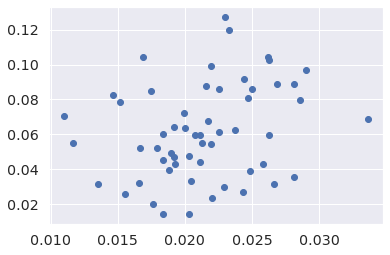

In [441]:
plt.scatter(csa_rn[~mask], csa_IT[~mask])

In [444]:
np.corrcoef(csa_rn[~mask], csa_IT[~mask])

array([[1.        , 0.25594349],
       [0.25594349, 1.        ]])

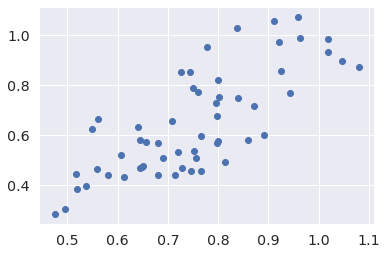

In [451]:
plt.scatter(dist_norm_rn[~mask], dist_norm_IT[~mask])

In [452]:
np.corrcoef(dist_norm_rn[~mask], dist_norm_IT[~mask])

array([[1.        , 0.76581842],
       [0.76581842, 1.        ]])

(0.0, 0.1)

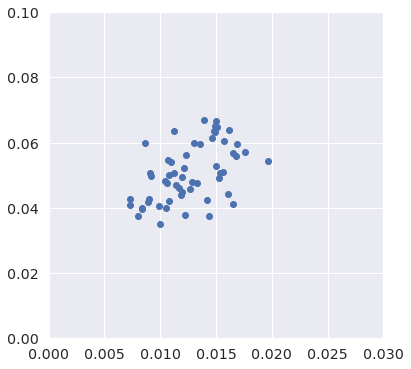

In [448]:
plt.figure(figsize=(6,6))
plt.scatter(ss_rn[~mask], ss_IT[~mask])
plt.xlim([0,0.03])
plt.ylim([0,0.1])

In [445]:
np.corrcoef(ss_rn[~mask], ss_IT[~mask])

array([[1.        , 0.50888089],
       [0.50888089, 1.        ]])

In [456]:
centers_IT = manifolds.mean(1)

In [457]:
centers_rn = manifolds_resnet.mean(1)

In [458]:
from scipy.spatial.distance import squareform, pdist
dists_IT = squareform(pdist(centers_IT))

In [461]:
dists_rn = squareform(pdist(centers_rn))

In [464]:
dists_IT.shape

(8, 8)

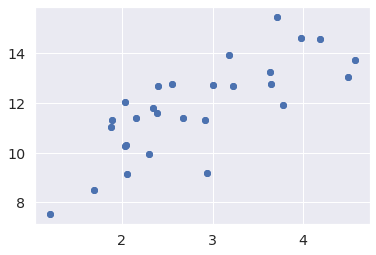

In [462]:
plt.scatter(dists_IT[~mask], dists_rn[~mask])

In [467]:
np.corrcoef(dists_rn[~mask], dists_IT[~mask])

array([[1.        , 0.76740008],
       [0.76740008, 1.        ]])

In [460]:
dists_IT.shape

(8, 8)

In [455]:
manifolds.shape

(8, 400, 168)

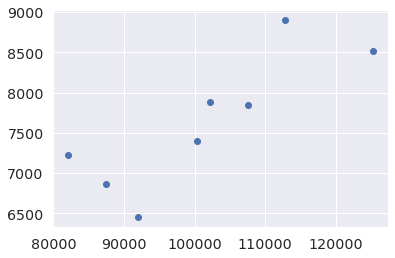

In [478]:
plt.scatter((Rs_rn**2).sum(-1),(Rs**2).sum(-1))

In [480]:
bias_rn = (Rs_rn**2).sum(-1)[:,None] / (Rs_rn**2).sum(-1) - 1

In [483]:
bias_IT = (Rs**2).sum(-1)[:,None] / (Rs**2).sum(-1) - 1

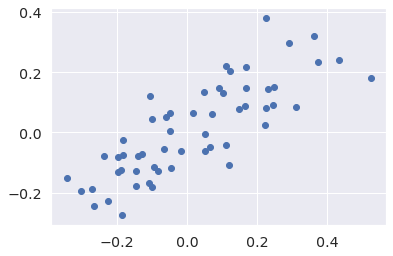

In [484]:
plt.scatter(bias_rn[~mask], bias_IT[~mask])

In [519]:
sns.set_style('darkgrid')

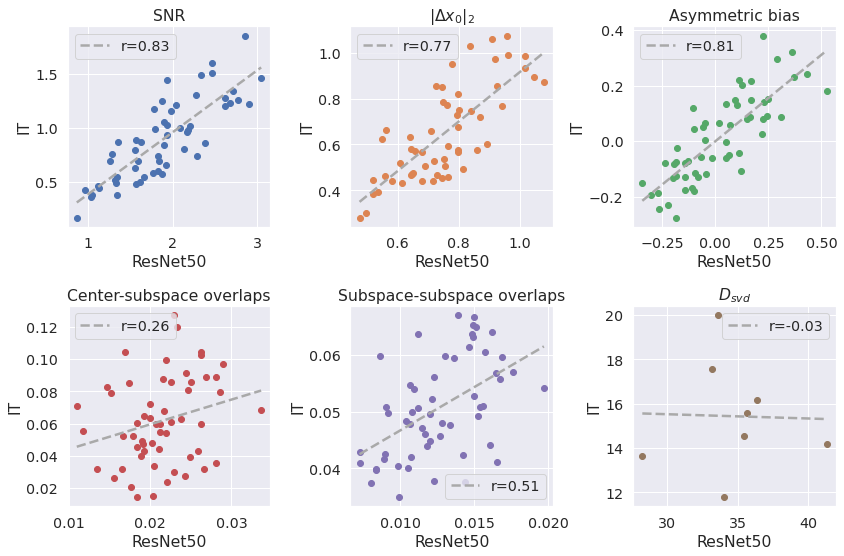

In [559]:
plt.figure(figsize=(12,8))

plt.subplot(231)
x = SNR_rn[~mask]
y = SNR_IT[~mask]
m,b = np.polyfit(x,y,1)
r = np.corrcoef(x,y)[0,1]
plt.scatter(x,y)
xx = np.linspace(np.min(x),np.max(x),100)
plt.plot(xx,m*xx+b, c='darkgrey', linestyle='dashed', label='r={:.2f}'.format(r))
plt.legend()
plt.xlabel('ResNet50')
plt.ylabel('IT')
plt.title('SNR')

plt.subplot(232)
x = dist_norm_rn[~mask]
y = dist_norm_IT[~mask]
m,b = np.polyfit(x,y,1)
r = np.corrcoef(x,y)[0,1]
plt.scatter(x,y, color='C1')
xx = np.linspace(np.min(x),np.max(x),100)
plt.plot(xx,m*xx+b, c='darkgrey', linestyle='dashed', label='r={:.2f}'.format(r))
plt.legend()
plt.xlabel('ResNet50')
plt.ylabel('IT')
plt.title('$\|\Delta x_0\|_2$')

plt.subplot(233)
x = bias_rn[~mask]
y = bias_IT[~mask]
m,b = np.polyfit(x,y,1)
r = np.corrcoef(x,y)[0,1]
plt.scatter(x,y,color='C2')
xx = np.linspace(np.min(x),np.max(x),100)
plt.plot(xx,m*xx+b, c='darkgrey', linestyle='dashed', label='r={:.2f}'.format(r))
plt.legend()
plt.xlabel('ResNet50')
plt.ylabel('IT')
plt.title('Asymmetric bias')

plt.subplot(234)
x = csa_rn[~mask]
y = csa_IT[~mask]
m,b = np.polyfit(x,y,1)
r = np.corrcoef(x,y)[0,1]
plt.scatter(x,y,color='C3')
xx = np.linspace(np.min(x),np.max(x),100)
plt.plot(xx,m*xx+b, c='darkgrey', linestyle='dashed', label='r={:.2f}'.format(r))
plt.legend()
plt.xlabel('ResNet50')
plt.ylabel('IT')
plt.title('Center-subspace overlaps')

plt.subplot(235)
x = ss_rn[~mask]
y = ss_IT[~mask]
m,b = np.polyfit(x,y,1)
r = np.corrcoef(x,y)[0,1]
plt.scatter(x,y,color='C4')
xx = np.linspace(np.min(x),np.max(x),100)
plt.plot(xx,m*xx+b, c='darkgrey', linestyle='dashed', label='r={:.2f}'.format(r))
plt.legend()
plt.xlabel('ResNet50')
plt.ylabel('IT')
plt.title('Subspace-subspace overlaps')
plt.tight_layout()

plt.subplot(236)
x = Ds_rn
y = Ds_IT
m,b = np.polyfit(x,y,1)
r = np.corrcoef(x,y)[0,1]
plt.scatter(x,y,color='C5')
xx = np.linspace(np.min(x),np.max(x),100)
plt.plot(xx,m*xx+b, c='darkgrey', linestyle='dashed', label='r={:.2f}'.format(r))
plt.legend()
plt.xlabel('ResNet50')
plt.ylabel('IT')
plt.title(r'$D_{svd}$')
plt.tight_layout()

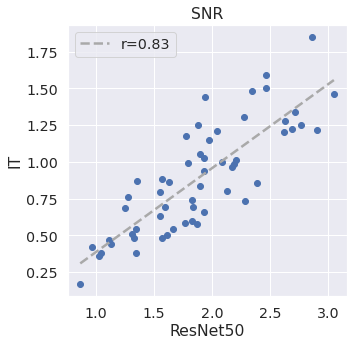

In [526]:
plt.figure(figsize=(5,5))
x = SNR_rn[~mask]
y = SNR_IT[~mask]
m,b = np.polyfit(x,y,1)
r = np.corrcoef(x,y)[0,1]
plt.scatter(x,y)
xx = np.linspace(np.min(x),np.max(x),100)
plt.plot(xx,m*xx+b, c='darkgrey', linestyle='dashed', label='r={:.2f}'.format(r))
plt.legend()
plt.xlabel('ResNet50')
plt.ylabel('IT')
plt.title('SNR');


(array([ 5.,  5.,  9.,  8.,  6.,  5., 10.,  6.,  1.,  1.]),
 array([0.0072673 , 0.00850988, 0.00975246, 0.01099504, 0.01223762,
        0.01348019, 0.01472277, 0.01596535, 0.01720793, 0.01845051,
        0.01969309]),
 <BarContainer object of 10 artists>)

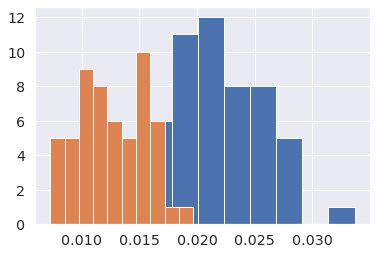

In [537]:
plt.hist(csa_rn[~mask])
plt.hist(ss_rn[~mask])

In [833]:
M_IT = 168
Ds0_IT = (M_IT*Ds_IT-1)/ (M_IT-Ds_IT)

In [834]:
M_rn = 2048
Ds0_rn = (M_rn*Ds_rn-1)/ (M_rn-Ds_rn)

In [779]:
N = 2048
Ms = np.logspace(5,11,10,base=2)
n_avg = 5
Dsvds = []
for M in tqdm(Ms):
    Dmean = []
    for _ in range(n_avg):
        A = np.random.randn(N,int(M)) / np.sqrt(M)
        manifolds_small = manifolds_resnet@A 
        for manifold in manifolds_small:
            center = manifold.mean(0)
            _,R,U = np.linalg.svd(manifold - center)
            Dsvd = np.sum(R**2)**2 / np.sum(R**4)
            Dsvds.append(Dsvd)
Dsvds = np.stack(Dsvds).reshape(len(Ms),n_avg,K).mean(1)
# C2s = np.stack(C2s).reshape(len(Ms),n_avg).mean(-1)

/home/bsorsch/.py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


In [779]:
N = 2048
Ms = np.logspace(5,11,10,base=2)
n_avg = 5
Dsvds = []
for M in tqdm(Ms):
    Dmean = []
    for _ in range(n_avg):
        A = np.random.randn(N,int(M)) / np.sqrt(M)
        manifolds_small = manifolds_resnet@A 
        for manifold in manifolds_small:
            center = manifold.mean(0)
            _,R,U = np.linalg.svd(manifold - center)
            Dsvd = np.sum(R**2)**2 / np.sum(R**4)
            Dsvds.append(Dsvd)
Dsvds = np.stack(Dsvds).reshape(len(Ms),n_avg,K).mean(1)
# C2s = np.stack(C2s).reshape(len(Ms),n_avg).mean(-1)

/home/bsorsch/.py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


In [973]:
N = 168
Ms = np.logspace(5,7,3,base=2)
n_avg = 50
Dsvds_IT = []
for M in tqdm(Ms):
    for _ in range(n_avg):
        A = np.random.randn(N,int(M)) / np.sqrt(M)
        manifolds_small = manifolds@A 
#         idxs = np.random.choice(N,int(M),replace=False)
#         manifolds_small = manifolds[:,:,idxs]
        for manifold in manifolds_small:
            center = manifold.mean(0)
            _,R,U = np.linalg.svd(manifold - center)
            Dsvd = np.sum(R**2)**2 / np.sum(R**4)
            Dsvds_IT.append(Dsvd)
Dsvds_IT = np.stack(Dsvds_IT).reshape(len(Ms),n_avg,K).mean(1)
# C2s = np.stack(C2s).reshape(len(Ms),n_avg).mean(-1)

/home/bsorsch/.py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


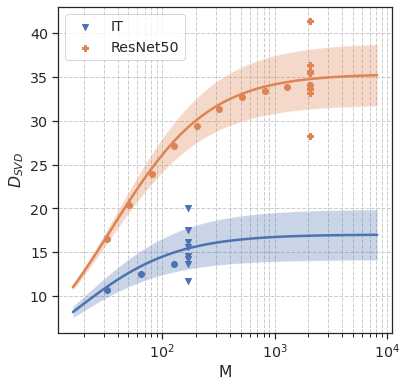

In [974]:
plt.figure(figsize=(6,6))
with sns.axes_style('ticks'):
    Ms = np.logspace(4,13,100, base=2)
    Ds_IT_pred = Ds0_IT / (1+Ds0_IT/Ms[:,None])
    plt.plot(Ms, Ds_IT_pred.mean(1));
    plt.fill_between(Ms, Ds_IT_pred.mean(1) + Ds_IT_pred.std(1),
                         Ds_IT_pred.mean(1) - Ds_IT_pred.std(1), alpha=0.3)
    Ds_IT_pred = Ds0_rn / (1+Ds0_rn/Ms[:,None])
    plt.plot(Ms, Ds0_rn.mean() / (1+Ds0_rn.mean()/Ms[:,None]));
    plt.fill_between(Ms, Ds_IT_pred.mean(1) + Ds_IT_pred.std(1),
                         Ds_IT_pred.mean(1) - Ds_IT_pred.std(1), alpha=0.3)

    plt.xscale('log')
    plt.scatter(M_IT*np.ones(len(Ds_IT)), Ds_IT, color='C0', marker='v', label='IT')
    plt.scatter(M_rn*np.ones(len(Ds_rn)), Ds_rn, color='C1', marker='P', label='ResNet50')
    # plt.yscale('log')

    Ms = np.logspace(5,11,10,base=2)
    plt.scatter(Ms, Dsvds.mean(1), color='C1')
    
    Ms = np.logspace(5,7,3,base=2)
    plt.scatter(Ms, Dsvds_IT.mean(1), color='C0')

    plt.xlabel('M')
    plt.ylabel(r'$D_{SVD}$')
    plt.grid(True, which='both',ls='--')
    plt.legend()
# plt.savefig('manifold/images/random_proj_D.pdf')

In [945]:
SNR0_rn = SNR_rn*np.sqrt(1+Ds0_rn/2048)

In [937]:
SNR0_IT = SNR_IT*np.sqrt(1+Ds0_IT/168)

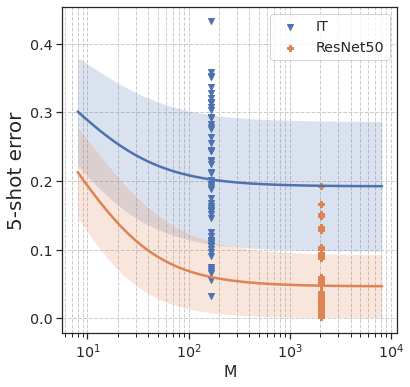

In [976]:
plt.figure(figsize=(6,6))
with sns.axes_style('ticks'):
    Ms = np.logspace(3,13,100, base=2)

    SNR_IT_pred = SNR0_IT / np.sqrt(1+Ds0_IT / Ms[:,None,None])
    err_IT_pred = H(SNR_IT_pred)
    plt.plot(Ms, np.nanmean(err_IT_pred,(1,2)))
    plt.fill_between(Ms, np.nanmean(err_IT_pred,(1,2)) + np.nanstd(err_IT_pred,(1,2)),
                    np.nanmean(err_IT_pred,(1,2)) - np.nanstd(err_IT_pred,(1,2)),alpha=0.2)

    SNR_rn_pred = SNR0_rn / np.sqrt(1+Ds0_rn / Ms[:,None,None])
    err_rn_pred = H(SNR_rn_pred)
    plt.plot(Ms, np.nanmean(err_rn_pred,(1,2)))
    plt.fill_between(Ms, np.nanmean(err_rn_pred,(1,2)) + np.nanstd(err_rn_pred,(1,2)),
                    np.nanmean(err_rn_pred,(1,2)) - np.nanstd(err_rn_pred,(1,2)),alpha=0.2)

    plt.scatter(M_IT*np.ones((K,K)), H(SNR_IT), color='C0', marker='v', label='IT')
    plt.scatter(M_rn*np.ones((K,K)), H(SNR_rn), color='C1', marker='P', label='ResNet50')

    plt.xscale('log')
    plt.xlabel('M')
    plt.ylabel('5-shot error', fontsize=20)
    plt.grid(True, which='both',ls='--')
    plt.legend()
# plt.savefig('manifold/images/random_proj_err_5shot.pdf')

# Asymmetric examples

In [639]:
err_IT.shape

(8, 8)

In [640]:
K = 8
i1,i2 = np.unravel_index(np.flip(np.argsort((err_IT - err_IT.T).ravel())), (K,K))

In [667]:
P = 400
def plot_single(idx):
    i = np.random.choice(400)
    image_path = stimulus_set.get_image(stimulus_set['image_id'][cat_idxs[idx][i]])
    img = image.imread(image_path)
    plt.imshow(img)
    plt.axis('off')

In [673]:
from IPython.display import clear_output

In [676]:
len(i1)

64

In [689]:
np.random.choice(np.arange(8,16))

12

In [ ]:
guesses = []
idxs = []
flip1s = []
flip2s = []
for j in range(100):
    clear_output()
    print(j)
    plt.figure(figsize=(14,10))
    i = np.random.choice(np.arange(8,16))
    flip1 = np.random.choice(2)
    flip2 = np.random.choice(2)
    plt.subplot(231)
    if flip1:
        plot_single(i2[i])
    else:
        plot_single(i1[i])
    plt.subplot(233)
    if flip1:
        plot_single(i1[i])
    else:
        plot_single(i2[i])
    plt.subplot(235)
    if flip2:
        plot_single(i2[i])
    else:
        plot_single(i1[i])
    
    
    plt.pause(0.001)
    guess = input()
    idxs.append(i)
    guesses.append(int(guess))
    flip1s.append(flip1)
    flip2s.append(flip2)
flip1s = np.stack(flip1s)
flip2s = np.stack(flip2s)

# Chabo vs Tito

In [629]:
features = compact_data.values

manifolds = []
for ci in class_idxs:
    manifolds.append(features[ci])
manifolds = np.stack(manifolds)

In [709]:
manifolds.shape

(8, 400, 168)

In [710]:
manifolds_chabo = manifolds[:,:,:58]
manifolds_tito = manifolds[:,:,58:]

In [722]:
Rs_chabo = []
centers_chabo = []
Us_chabo = []
idxs = np.random.choice(manifolds_chabo.shape[-1], 50)
for manifold in manifolds_chabo[:,:,idxs]:
    centers_chabo.append(manifold.mean(0))
    U,R,V = np.linalg.svd(manifold - manifold.mean(0),full_matrices=False)
    Rs_chabo.append(R)
    Us_chabo.append(V)
Rs_chabo = np.stack(Rs_chabo)
centers_chabo = np.stack(centers_chabo)
Us_chabo = np.stack(Us_chabo)

In [723]:
Rs_tito = []
centers_tito = []
Us_tito = []
idxs = np.random.choice(manifolds_tito.shape[-1], 50)
for manifold in manifolds_tito[:,:,idxs]:
    centers_tito.append(manifold.mean(0))
    U,R,V = np.linalg.svd(manifold - manifold.mean(0),full_matrices=False)
    Rs_tito.append(R)
    Us_tito.append(V)
Rs_tito = np.stack(Rs_tito)
centers_tito = np.stack(centers_tito)
Us_tito = np.stack(Us_tito)

In [726]:
dist_norm_tito, Ds_tito, csa_tito, ss_tito, SNR_tito = geometry(
    centers_tito,Rs_tito,Us_tito,m)

In [727]:
dist_norm_chabo, Ds_chabo, csa_chabo, ss_chabo, SNR_chabo = geometry(
    centers_chabo,Rs_chabo,Us_chabo,m)

In [728]:
Ds_tito.shape

(8,)

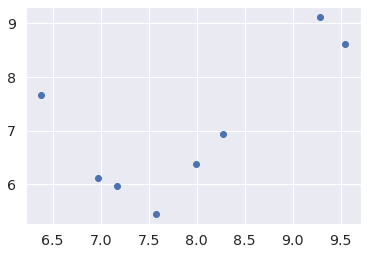

In [729]:
plt.scatter(Ds_tito, Ds_chabo)

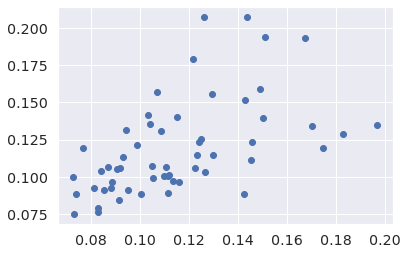

In [732]:
mask = np.eye(K,dtype='bool')
plt.scatter(ss_tito[~mask], ss_chabo[~mask])

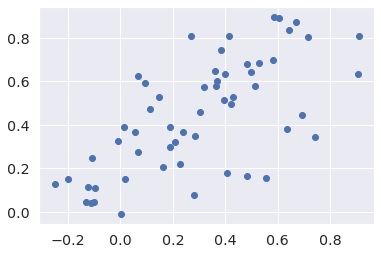

In [733]:
mask = np.eye(K,dtype='bool')
plt.scatter(SNR_tito[~mask], SNR_chabo[~mask])

In [735]:
bias_chabo = (Rs_chabo**2).sum(-1)[:,None] / (Rs_chabo**2).sum(-1) - 1
bias_tito = (Rs_tito**2).sum(-1)[:,None] / (Rs_tito**2).sum(-1) - 1

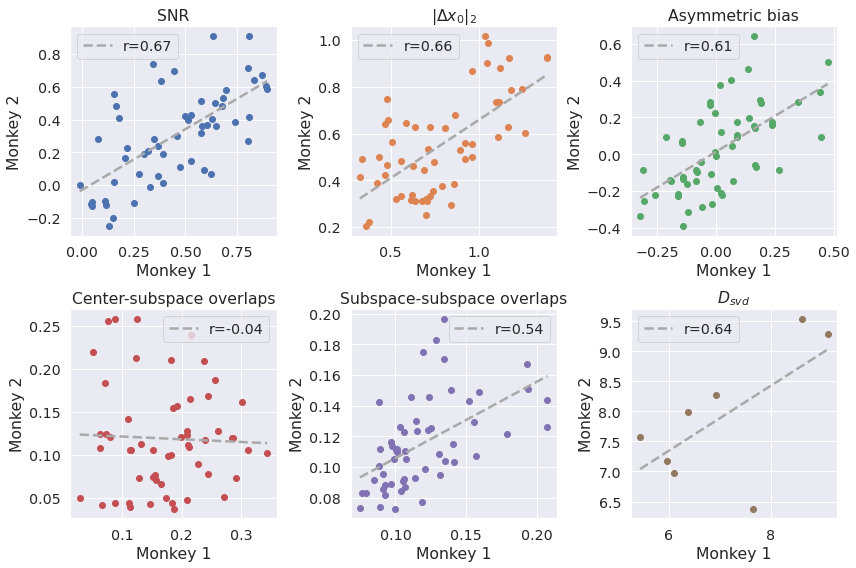

In [737]:
plt.figure(figsize=(12,8))

plt.subplot(231)
x = SNR_chabo[~mask]
y = SNR_tito[~mask]
m,b = np.polyfit(x,y,1)
r = np.corrcoef(x,y)[0,1]
plt.scatter(x,y)
xx = np.linspace(np.min(x),np.max(x),100)
plt.plot(xx,m*xx+b, c='darkgrey', linestyle='dashed', label='r={:.2f}'.format(r))
plt.legend()
plt.xlabel('Monkey 1')
plt.ylabel('Monkey 2')
plt.title('SNR')

plt.subplot(232)
x = dist_norm_chabo[~mask]
y = dist_norm_tito[~mask]
m,b = np.polyfit(x,y,1)
r = np.corrcoef(x,y)[0,1]
plt.scatter(x,y, color='C1')
xx = np.linspace(np.min(x),np.max(x),100)
plt.plot(xx,m*xx+b, c='darkgrey', linestyle='dashed', label='r={:.2f}'.format(r))
plt.legend()
plt.xlabel('Monkey 1')
plt.ylabel('Monkey 2')
plt.title('$\|\Delta x_0\|_2$')

plt.subplot(233)
x = bias_chabo[~mask]
y = bias_tito[~mask]
m,b = np.polyfit(x,y,1)
r = np.corrcoef(x,y)[0,1]
plt.scatter(x,y,color='C2')
xx = np.linspace(np.min(x),np.max(x),100)
plt.plot(xx,m*xx+b, c='darkgrey', linestyle='dashed', label='r={:.2f}'.format(r))
plt.legend()
plt.xlabel('Monkey 1')
plt.ylabel('Monkey 2')
plt.title('Asymmetric bias')

plt.subplot(234)
x = csa_chabo[~mask]
y = csa_tito[~mask]
m,b = np.polyfit(x,y,1)
r = np.corrcoef(x,y)[0,1]
plt.scatter(x,y,color='C3')
xx = np.linspace(np.min(x),np.max(x),100)
plt.plot(xx,m*xx+b, c='darkgrey', linestyle='dashed', label='r={:.2f}'.format(r))
plt.legend()
plt.xlabel('Monkey 1')
plt.ylabel('Monkey 2')
plt.title('Center-subspace overlaps')

plt.subplot(235)
x = ss_chabo[~mask]
y = ss_tito[~mask]
m,b = np.polyfit(x,y,1)
r = np.corrcoef(x,y)[0,1]
plt.scatter(x,y,color='C4')
xx = np.linspace(np.min(x),np.max(x),100)
plt.plot(xx,m*xx+b, c='darkgrey', linestyle='dashed', label='r={:.2f}'.format(r))
plt.legend()
plt.xlabel('Monkey 1')
plt.ylabel('Monkey 2')
plt.title('Subspace-subspace overlaps')
plt.tight_layout()

plt.subplot(236)
x = Ds_chabo
y = Ds_tito
m,b = np.polyfit(x,y,1)
r = np.corrcoef(x,y)[0,1]
plt.scatter(x,y,color='C5')
xx = np.linspace(np.min(x),np.max(x),100)
plt.plot(xx,m*xx+b, c='darkgrey', linestyle='dashed', label='r={:.2f}'.format(r))
plt.legend()
plt.xlabel('Monkey 1')
plt.ylabel('Monkey 2')
plt.title(r'$D_{svd}$')
plt.tight_layout()